#Spark+IPython
Spark pi approximation example (https://spark.apache.org/examples.html)

In [1]:
# Define the operation to distribute
def sample(p):
    from random import random # Random is loaded locally in slaves
    x, y = random(), random()
    return 1 if x*x + y*y < 1 else 0

In [2]:
NUM_SAMPLES = 100000
# Spark context is in "sc" variable
count = sc.parallelize(xrange(0, NUM_SAMPLES)) \
             .map(sample)\
             .reduce(lambda a, b: a + b)
print "Pi is roughly %f" % (4.0 * count / NUM_SAMPLES)

Pi is roughly 3.147320


## What about IPython visualization?
Let's plot the convergence of pi

In [45]:
NUM_SAMPLES = 100000
BUCKET_SIZE = 100

def sample(p):
    from random import random # Random is loaded locally in slaves
    x, y = random(), random()
    return p, 1 if x*x + y*y < 1 else 0
# Distributes the computation and returns the approximation
def computeSample(sampleSize, bucketSize):
    samples = sc.parallelize(xrange(0, sampleSize))
    # generate the random series where the first item is the id, and the second is the random
    samples = samples.map(sample)
    # assign to each point its bucket id
    samples = samples.map(lambda d: tuple([d[0]/bucketSize, d[1]]))
    # reduce the random values adding them
    samples = samples.reduceByKey(lambda a,b: a+b)
    # use the formula to approximate pi
    samples = samples.map(lambda d: tuple([d[0],4.0*d[1]/bucketSize]))
    return samples
    
samples = computeSample(NUM_SAMPLES, BUCKET_SIZE).collect()
samples = [s[1] for s in samples] # extract approximations
samples = [sum(samples[0:i])/(i+1) for i in xrange(len(samples))]

    

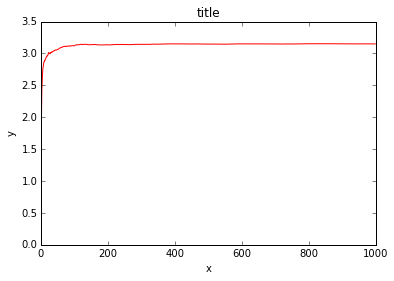

In [46]:
%matplotlib inline
from pylab import *
import numpy as np
figure()
plot(np.array(range(NUM_SAMPLES/BUCKET_SIZE)), np.array(samples), 'r')
xlabel('x')
ylabel('y')
title('title')
show()